<a href="https://colab.research.google.com/github/othmanebenlamlih/intership/blob/main/intershipfed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pneumonia



---


> ***Pneumonia*** is a lung infection that causes inflammation and damage to lung tissue.In a healthy person, the alveoli fill with air during breathing; however, in people with pneumonia, the alveoli are already filled with pus and fluid that affects gas exchange.


---





In [1]:
from IPython.display import Image 
Image(url="https://www.clinicbarcelona.org/uploads/media/default/0001/09/028fd0195b02b208a3118ea9797c3b2e37ed148f.png")

# What is Pneumonia?



---


***Pneumonia*** is an inflammatory condition of the lung affecting primarily the small air sacs known as alveoli.Symptoms typically include some combination of productive or dry cough, chest pain, fever and difficulty breathing. The severity of the condition is variable. ***Pneumonia*** is usually caused by infection with viruses or bacteria and less commonly by other microorganisms, certain medications or conditions such as autoimmune diseases.Risk factors include cystic fibrosis, chronic obstructive pulmonary disease (COPD), asthma, diabetes, heart failure, a history of smoking, a poor ability to cough such as following a stroke and a weak immune system. Diagnosis is often based on symptoms and physical examination.
Chest X-ray, blood tests, and culture of the sputum may help confirm the diagnosis.The disease may be classified by where it was acquired, such as community- or hospital-acquired or healthcare-associated pneumonia.


---




# package

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.layers import Dense, GlobalAveragePooling2D
from keras.layers import GlobalMaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os
import numpy as np # linear algebra
import pandas as pd 
from keras.models import Model

# Description of the Pneumonia Dataset



---


The dataset is organized into 3 folders (train, test, val) and contains subfolders for each image category (Pneumonia/Normal). There are 5,863 X-Ray images (JPEG) and 2 categories (Pneumonia/Normal). Chest X-ray images (anterior-posterior) were selected from retrospective cohorts of pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou. All chest X-ray imaging was performed as part of patients’ routine clinical care. For the analysis of chest x-ray images, all chest radiographs were initially screened for quality control by removing all low quality or unreadable scans. The diagnoses for the images were then graded by two expert physicians before being cleared for training the AI system. In order to account for any grading errors, the evaluation set was also checked by a third expert.


---



In [3]:
! pip install -q kaggle

In [4]:
from google.colab import files

In [5]:
#on adapte notre json file de notre kaggle profile
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"benlamlihothmane","key":"ebc68494200b00eb5534850edcf3ab77"}'}

In [6]:
!mkdir -p ~/.kaggle

In [7]:
!cp kaggle.json ~/.kaggle/

In [8]:
!ls ~/.kaggle

kaggle.json


In [9]:
!chmod 600 /root/.kaggle/kaggle.json

In [10]:
#kaggle data
!kaggle datasets download  "paultimothymooney/chest-xray-pneumonia"

100% 2.29G/2.29G [00:30<00:00, 35.9MB/s]
100% 2.29G/2.29G [00:30<00:00, 81.3MB/s]


In [11]:
#le fichier est zip , on va unsiper le fichier pour acceder anotre data
!unzip chest-xray-pneumonia.zip

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-04

## Loading the Dataset

In [12]:
train_dir = "/content/chest_xray/chest_xray/train"
test_dir = "/content/chest_xray/chest_xray/test"
val_dir = "/content/chest_xray/chest_xray/val"

print("Train set:\n========================================")
num_pneumonia = len(os.listdir(os.path.join(train_dir, 'PNEUMONIA')))
num_normal = len(os.listdir(os.path.join(train_dir, 'NORMAL')))
print(f"PNEUMONIA={num_pneumonia}")
print(f"NORMAL={num_normal}")

print("Test set:\n========================================")
print(f"PNEUMONIA={len(os.listdir(os.path.join(test_dir, 'PNEUMONIA')))}")
print(f"NORMAL={len(os.listdir(os.path.join(test_dir, 'NORMAL')))}")

print("Validation set:\n========================================")
print(f"PNEUMONIA={len(os.listdir(os.path.join(val_dir, 'PNEUMONIA')))}")
print(f"NORMAL={len(os.listdir(os.path.join(val_dir, 'NORMAL')))}")



Train set:
PNEUMONIA=3876
NORMAL=1342
Test set:
PNEUMONIA=390
NORMAL=234
Validation set:
PNEUMONIA=9
NORMAL=9


## Data Visualization & Preprocessing

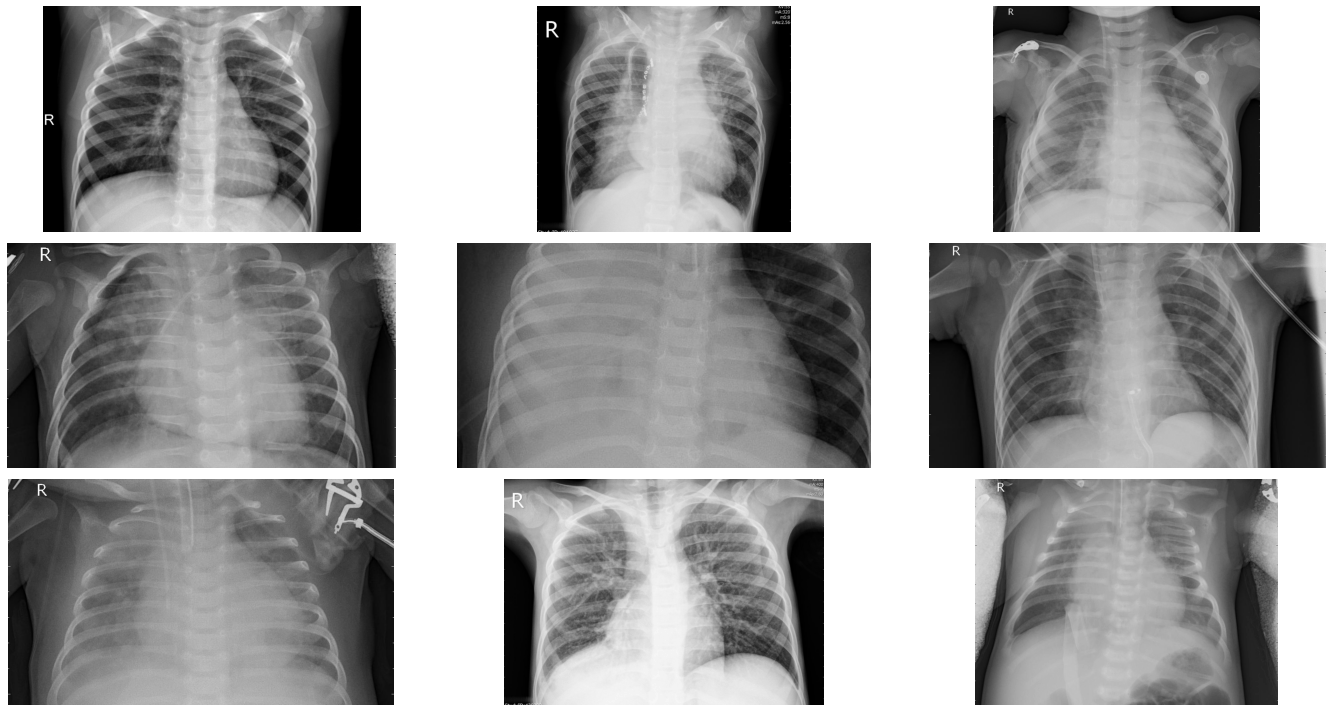

In [13]:
pneumonia = os.listdir("/content/chest_xray/train/PNEUMONIA")
pneumonia_dir = "/content/chest_xray/train/PNEUMONIA"

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(pneumonia_dir, pneumonia[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
plt.tight_layout()

***normal cas***

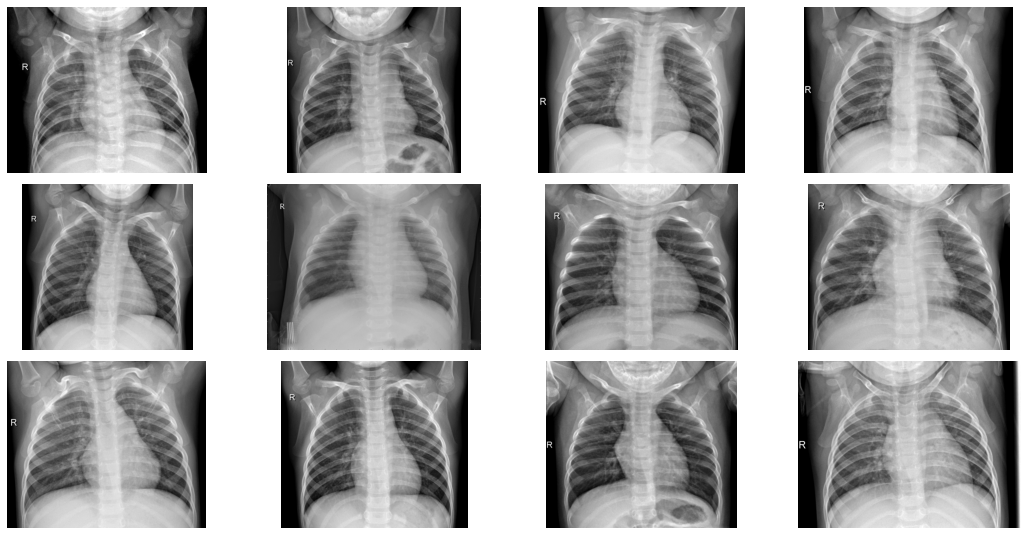

In [14]:
path = "/content/chest_xray/chest_xray/train/NORMAL"
#listdir =retourne une liste contenant les noms des entrées dans le répertoire donné par chemin
data_exemple = os.listdir(path)
plt.figure(figsize=(15, 10))

for i in range(12):
    plt.subplot(4, 4, i + 1)
    #imread =charge une image à partir du fichier spécifié
    img = plt.imread(os.path.join(path, data_exemple[i]))
    #imshow = affiche l'imagerie 
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
plt.tight_layout()

***cas pneumonia***

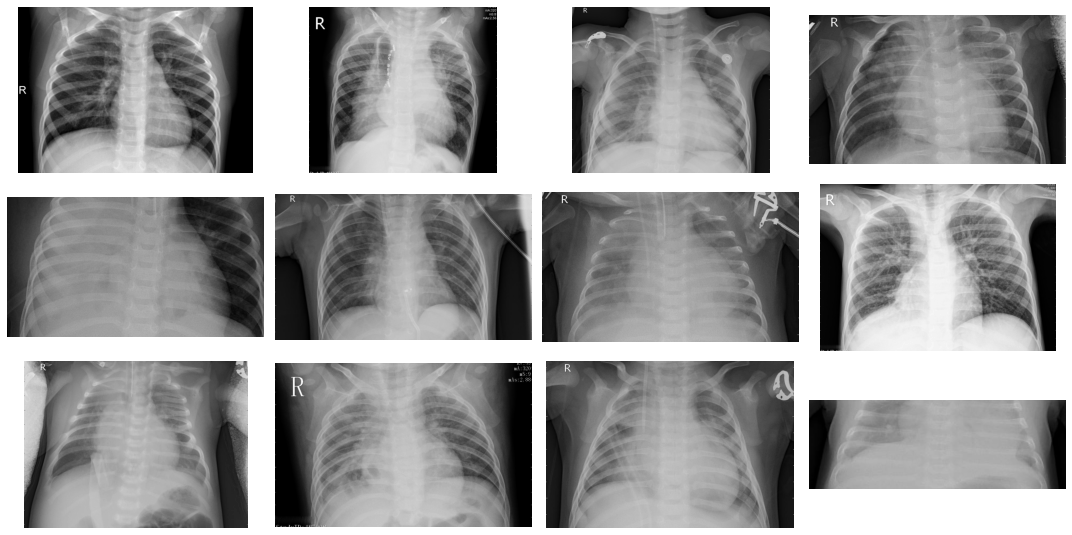

In [15]:
path = "/content/chest_xray/chest_xray/train/PNEUMONIA"
#listdir =retourne une liste contenant les noms des entrées dans le répertoire donné par chemin
data_exemple = os.listdir(path)
plt.figure(figsize=(15, 10))

for i in range(12):
    plt.subplot(4, 4, i + 1)
    #imread =charge une image à partir du fichier spécifié
    img = plt.imread(os.path.join(path, data_exemple[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
plt.tight_layout()

## pixel value distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, '# Pixels in Image')

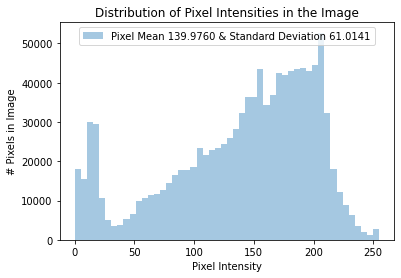

In [16]:
normal_img = os.listdir("/content/chest_xray/chest_xray/train/PNEUMONIA")[58]
normal_dir = "/content/chest_xray/chest_xray/train/PNEUMONIA"
sample_img = plt.imread(os.path.join(normal_dir, normal_img))
sns.distplot(sample_img.ravel(),
            label=f"Pixel Mean {np.mean(sample_img):.4f} & Standard Deviation {np.std(sample_img):.4f}", kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

# ***Deep Learning in Healthcare*** — X-Ray Imaging

## Image Preprocessing

Before training, you'll first modify your images to be better suited for training a convolutional neural network. For this task you'll use the Keras ImageDataGenerator function to perform data preprocessing and data augmentation.


*   This class also provides support for basic data augmentation such as random horizontal flipping of images.
*   We also use the generator to transform the values in each batch so that their mean is 0 and their standard deviation is 1 (this will faciliate model training by standardizing the input distribution).
*   The generator also converts our single channel X-ray images (gray-scale) to a three-channel format by repeating the values in the image across all channels (we will want this because the pre-trained model that we'll use requires three-channel inputs).



In [135]:
from keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    samplewise_center=True,
    samplewise_std_normalization=True
)

Now we need to build a new generator for validation and t esting data.

In [136]:
train = image_generator.flow_from_directory(train_dir, 
                                            shuffle=True, 
                                            class_mode='binary',
                                            target_size=(320, 320))

validation = image_generator.flow_from_directory(val_dir, 
                                                batch_size=1, 
                                                shuffle=False, 
                                                class_mode='binary',
                                                target_size=(320, 320))

test = image_generator.flow_from_directory(test_dir, 
                                            batch_size=1, 
                                            shuffle=False, 
                                            class_mode='binary',
                                            target_size=(320, 320))

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


## Model Building

**Class weights**

In [137]:
weight_for_0 = num_pneumonia / (num_normal + num_pneumonia)
weight_for_1 = num_normal / (num_normal + num_pneumonia)

class_weight = {0: weight_for_0, 1: weight_for_1}

print(f"Weight for class 0: {weight_for_0:.2f}")
print(f"Weight for class 1: {weight_for_1:.2f}")

Weight for class 0: 0.74
Weight for class 1: 0.26


In [20]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization


model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(320, 320, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(320, 320, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

In [21]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 318, 318, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 318, 318, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 316, 316, 32)      9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 316, 316, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 158, 158, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 156, 156, 64)      18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 156, 156, 64)      2

In [23]:
CNN = model.fit(
    train, 
    epochs=10,
    validation_data=validation, 
    class_weight=class_weight,
    steps_per_epoch=100,
    validation_steps=12,
)

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Epoch 1/10
100/100 [==============================] - 146s 946ms/step - loss: 2.2965 - accuracy: 0.8128 - val_loss: 7.9610 - val_accuracy: 0.3333
Epoch 2/10
100/100 [==============================] - 96s 961ms/step - loss: 0.1339 - accuracy: 0.9059 - val_loss: 17.9938 - val_accuracy: 0.3333
Epoch 3/10
100/100 [==============================] - 97s 964ms/step - loss: 0.1077 - accuracy: 0.8992 - val_loss: 5.1571 - val_accuracy: 0.3333
Epoch 4/10
100/100 [==============================] - 96s 957ms/step - loss: 0.0744 - accuracy: 0.9299 - val_loss: 10.7552 - val_accuracy: 0.3333
Epoch 5/10
100/100 [==============================] - 96s 961ms/step - loss: 0.0777 - accuracy: 0.9255 - val_loss: 1.9033 - val_accuracy: 0.4167
Epoch 6/10
100/100 [==============================] - 95s 948ms/step - loss: 0.0655 - accuracy: 0.9328 - val_loss: 2.3872 - val_accura


## Evaluation

Text(0, 0.5, 'values')

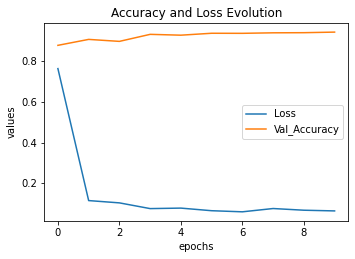

In [24]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(CNN.history['loss'], label='Loss')
plt.plot(CNN.history['accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy and Loss Evolution')
plt.xlabel('epochs')
plt.ylabel('values')


In [25]:
predicted_vals = model.predict(test, steps=len(test))

In [26]:
print(confusion_matrix(test.classes, predicted_vals > 0.5))
pd.DataFrame(classification_report(test.classes, predicted_vals > 0.5, output_dict=True))

[[163  71]
 [ 17 373]]


,0,1,accuracy,macro avg,weighted avg
precision,0.905556,0.840090,0.858974,0.872823,0.864640
recall,0.696581,0.956410,0.858974,0.826496,0.858974
f1-score,0.787440,0.894484,0.858974,0.840962,0.854343
support,234.000000,390.000000,0.858974,624.000000,624.000000


In [27]:
print(confusion_matrix(test.classes, predicted_vals > 0.7))
pd.DataFrame(classification_report(test.classes, predicted_vals > 0.7, output_dict=True))

[[183  51]
 [ 23 367]]


,0,1,accuracy,macro avg,weighted avg
precision,0.888350,0.877990,0.88141,0.883170,0.881875
recall,0.782051,0.941026,0.88141,0.861538,0.881410
f1-score,0.831818,0.908416,0.88141,0.870117,0.879692
support,234.000000,390.000000,0.88141,624.000000,624.000000


In [28]:
evaluationCNN = model.evaluate(test)
evaluationCNNT = model.evaluate(train)


163/163 [==============================] - 141s 862ms/step - loss: 0.1657 - accuracy: 0.9377


In [29]:
evaluationCNN[1]

0.8653846383094788

In [30]:
evaluationCNNT[1]

0.9376916885375977

Our model is ready! Now we will save it to Google Drive. For that, first we will mount the drive

# Transfer learning

## Introduction

Transfer learning consists of taking features learned on one problem, and leveraging them on a new, similar problem.

Transfer learning is usually done for tasks where your dataset has too little data to train a full-scale model from scratch.

The most common incarnation of transfer learning in the context of deep learning is the following workflow:


1.   Take layers from a previously trained model.
2.   Freeze them, so as to avoid destroying any of the information they contain during future training rounds.
3.   Add some new, trainable layers on top of the frozen layers. They will learn to turn the old features into predictions on a new dataset.
4.   rain the new layers on your dataset.
A last, optional step, is fine-tuning, which consists of unfreezing the entire model you obtained above (or part of it), and re-training it on the new data with a very low learning rate. This can potentially achieve meaningful improvements, by incrementally adapting the pretrained features to the new data.



## VGG16

In [31]:
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model

In [32]:
from keras.applications.vgg16 import VGG16
taille=(320, 320, 3)
model_vgg16 = VGG16(input_shape=taille, include_top=False, weights='imagenet')

58900480/58889256 [==============================] - 0s 0us/step


In [33]:
model_vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 320, 320, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 320, 320, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 320, 320, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 160, 160, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 160, 160, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 160, 160, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 80, 80, 128)       0     

In [34]:
# Freeze the base_model
model_vgg16.trainable = False

In [35]:
layers = model_vgg16.layers
print(f"The model has {len(layers)} layers")

The model has 19 layers


In [36]:
model_vgg16.output

<KerasTensor: shape=(None, 10, 10, 512) dtype=float32 (created by layer 'block5_pool')>

In [37]:

x = model_vgg16.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
# Add a final sigmoid layer for classification
outputs =Dense(1, activation="sigmoid")(x)



In [38]:
model_vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 320, 320, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 320, 320, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 320, 320, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 160, 160, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 160, 160, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 160, 160, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 80, 80, 128)       0     

In [39]:
model = Model(inputs=model_vgg16.input, outputs=outputs)
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])


In [40]:
vgg16 = model.fit(train,epochs=12,validation_data=validation,class_weight=class_weight,
    steps_per_epoch=100,validation_steps=25,
)

Epoch 1/12
100/100 [==============================] - 107s 929ms/step - loss: 0.2069 - accuracy: 0.6714 - val_loss: 0.7571 - val_accuracy: 0.7500
Epoch 2/12
100/100 [==============================] - 97s 964ms/step - loss: 0.0852 - accuracy: 0.9132
Epoch 3/12
100/100 [==============================] - 95s 949ms/step - loss: 0.0676 - accuracy: 0.9321
Epoch 4/12
100/100 [==============================] - 95s 948ms/step - loss: 0.0522 - accuracy: 0.9456
Epoch 5/12
100/100 [==============================] - 95s 945ms/step - loss: 0.0563 - accuracy: 0.9405
Epoch 6/12
100/100 [==============================] - 94s 943ms/step - loss: 0.0451 - accuracy: 0.9548
Epoch 7/12
100/100 [==============================] - 94s 941ms/step - loss: 0.0416 - accuracy: 0.9571
Epoch 8/12
100/100 [==============================] - 94s 941ms/step - loss: 0.0406 - accuracy: 0.9627
Epoch 9/12
100/100 [==============================] - 95s 944ms/step - loss: 0.0378 - accuracy: 0.9636
Epoch 10/12
100/100 [=========

Text(0, 0.5, 'values')

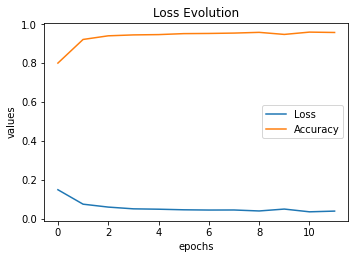

In [41]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(vgg16.history['loss'], label='Loss')
plt.plot(vgg16.history['accuracy'], label='Accuracy')
plt.legend()
plt.title('Loss Evolution')
plt.xlabel('epochs')
plt.ylabel('values')

In [42]:
evaluationVGG16 = model.evaluate(test)
print(f"Test Accuracy: {evaluationVGG16[1] * 100:.2f}%")

evaluationVGG16T = model.evaluate(train)
print(f"Train Accuracy: {evaluationVGG16[1] * 100:.2f}%")

624/624 [==============================] - 20s 32ms/step - loss: 0.4312 - accuracy: 0.8750
Test Accuracy: 87.50%
163/163 [==============================] - 152s 931ms/step - loss: 0.0777 - accuracy: 0.9701
Train Accuracy: 87.50%


In [43]:
evaluationVGG16[1]

0.875

In [44]:
evaluationVGG16T[1]

0.9700919985771179

## VGG19

In [149]:
from keras.applications.vgg19 import VGG19

taille=(320, 320, 3)
model_vgg19 = VGG19(input_shape=taille, include_top=False, weights='imagenet')

In [150]:
model_vgg19.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 320, 320, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 320, 320, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 320, 320, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 160, 160, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 160, 160, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 160, 160, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 80, 80, 128)       0     

In [151]:
# Freeze the base_model
model_vgg19.trainable = False
layers = model_vgg19.layers
print(f"The model has {len(layers)} layers")

The model has 22 layers


In [152]:
model_vgg19.output

<KerasTensor: shape=(None, 10, 10, 512) dtype=float32 (created by layer 'block5_pool')>

In [153]:
x = model_vgg19.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
# Add a final sigmoid layer for classification
outputs =Dense(1, activation="sigmoid")(x)

In [154]:
model = Model(inputs=model_vgg19.input, outputs=outputs)
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])


In [155]:
vgg19 = model.fit(train,epochs=12,validation_data=validation,class_weight=class_weight,
    steps_per_epoch=100,validation_steps=25,
)

Epoch 1/12
100/100 [==============================] - 97s 956ms/step - loss: 0.2033 - accuracy: 0.7272 - val_loss: 0.8507 - val_accuracy: 0.6250
Epoch 2/12
100/100 [==============================] - 94s 932ms/step - loss: 0.0844 - accuracy: 0.9187
Epoch 3/12
100/100 [==============================] - 93s 924ms/step - loss: 0.0714 - accuracy: 0.9349
Epoch 4/12
100/100 [==============================] - 94s 938ms/step - loss: 0.0592 - accuracy: 0.9424
Epoch 5/12
100/100 [==============================] - 93s 932ms/step - loss: 0.0593 - accuracy: 0.9341
Epoch 6/12
100/100 [==============================] - 94s 934ms/step - loss: 0.0604 - accuracy: 0.9366
Epoch 7/12
100/100 [==============================] - 94s 935ms/step - loss: 0.0491 - accuracy: 0.9497
Epoch 8/12
100/100 [==============================] - 94s 940ms/step - loss: 0.0470 - accuracy: 0.9546
Epoch 9/12
100/100 [==============================] - 94s 939ms/step - loss: 0.0462 - accuracy: 0.9461
Epoch 10/12
100/100 [==========

Text(0, 0.5, 'values')

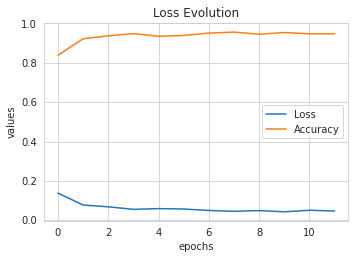

In [156]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(vgg19.history['loss'], label='Loss')
plt.plot(vgg19.history['accuracy'], label='Accuracy')
plt.legend()
plt.title('Loss Evolution')
plt.xlabel('epochs')
plt.ylabel('values')


In [157]:
evaluationVGG19 = model.evaluate(test)
print(f"Test Accuracy: {evaluationVGG19[1] * 100:.2f}%")

evaluationVGG19T = model.evaluate(train)
print(f"Train Accuracy: {evaluationVGG19[1] * 100:.2f}%")

624/624 [==============================] - 21s 33ms/step - loss: 0.5757 - accuracy: 0.7981
Test Accuracy: 79.81%
163/163 [==============================] - 156s 957ms/step - loss: 0.0894 - accuracy: 0.9672
Train Accuracy: 79.81%


In [160]:
evaluationVGG19[1]

0.7980769276618958

In [161]:
evaluationVGG19T[1]

0.9672162532806396

## InceptionV3

In [60]:
from keras.applications.inception_v3 import InceptionV3, preprocess_input
taille=(320, 320, 3)
model_v3 =  InceptionV3(input_shape=taille, include_top=False, weights='imagenet')

87924736/87910968 [==============================] - 0s 0us/step


In [61]:
# Freeze the base_model
model_v3.trainable = False
layers = model_v3.layers
print(f"The model has {len(layers)} layers")

The model has 311 layers


In [62]:
model_v3.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 320, 320, 3) 0                                            
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 159, 159, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_6 (BatchNor (None, 159, 159, 32) 96          conv2d_6[0][0]                   
__________________________________________________________________________________________________
activation (Activation)         (None, 159, 159, 32) 0           batch_normalization_6[0][0]      
_______________________________________________________________________________________

In [63]:
model_v3.output

<KerasTensor: shape=(None, 8, 8, 2048) dtype=float32 (created by layer 'mixed10')>

In [64]:
x = model_v3.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
# Add a final sigmoid layer for classification
outputs =Dense(1, activation="sigmoid")(x)

In [65]:
model = Model(inputs=model_v3.input, outputs=outputs)
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [66]:
V3 = model.fit(train,epochs=12,validation_data=validation,class_weight=class_weight,
    steps_per_epoch=100,validation_steps=25,
)

Epoch 1/12
100/100 [==============================] - 113s 956ms/step - loss: 0.1751 - accuracy: 0.7720 - val_loss: 0.8258 - val_accuracy: 0.7500
Epoch 2/12
100/100 [==============================] - 89s 885ms/step - loss: 0.0694 - accuracy: 0.9242
Epoch 3/12
100/100 [==============================] - 88s 878ms/step - loss: 0.0598 - accuracy: 0.9400
Epoch 4/12
100/100 [==============================] - 89s 885ms/step - loss: 0.0656 - accuracy: 0.9293
Epoch 5/12
100/100 [==============================] - 89s 885ms/step - loss: 0.0586 - accuracy: 0.9335
Epoch 6/12
100/100 [==============================] - 88s 878ms/step - loss: 0.0637 - accuracy: 0.9259
Epoch 7/12
100/100 [==============================] - 89s 885ms/step - loss: 0.0509 - accuracy: 0.9397
Epoch 8/12
100/100 [==============================] - 89s 884ms/step - loss: 0.0552 - accuracy: 0.9409
Epoch 9/12
100/100 [==============================] - 88s 882ms/step - loss: 0.0513 - accuracy: 0.9461
Epoch 10/12
100/100 [=========

Text(0, 0.5, 'values')

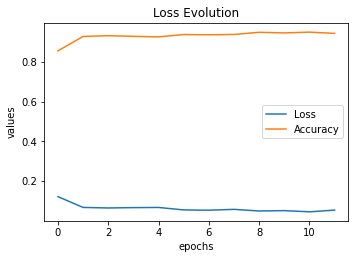

In [67]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(V3.history['loss'], label='Loss')
plt.plot(V3.history['accuracy'], label='Accuracy')
plt.legend()
plt.title('Loss Evolution')
plt.xlabel('epochs')
plt.ylabel('values')


In [68]:
evaluationV3 = model.evaluate(test)
print(f"Test Accuracy: {evaluationV3[1] * 100:.2f}%")

evaluationV3T = model.evaluate(train)
print(f"Train Accuracy: {evaluationV3[1] * 100:.2f}%")

624/624 [==============================] - 22s 35ms/step - loss: 0.3719 - accuracy: 0.8349
Test Accuracy: 83.49%
163/163 [==============================] - 144s 885ms/step - loss: 0.1240 - accuracy: 0.9526
Train Accuracy: 83.49%


In [69]:
evaluationV3[1]

0.8349359035491943

In [70]:
evaluationV3T[1]

0.9526457190513611

## DenseNet

In [163]:
from keras.applications.densenet import DenseNet121


In [164]:
model_DenseNet121= DenseNet121(input_shape=taille, include_top=False, weights='imagenet')

In [165]:
# Freeze the base_model
model_DenseNet121.trainable = False
layers = model_DenseNet121.layers
print(f"The model has {len(layers)} layers")

The model has 427 layers


In [166]:
model_DenseNet121.summary()

Model: "densenet121"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 320, 320, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_4 (ZeroPadding2D (None, 326, 326, 3)  0           input_11[0][0]                   
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 160, 160, 64) 9408        zero_padding2d_4[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 160, 160, 64) 256         conv1/conv[0][0]                 
________________________________________________________________________________________

In [167]:
model_DenseNet121.output

<KerasTensor: shape=(None, 10, 10, 1024) dtype=float32 (created by layer 'relu')>

In [168]:
x = model_DenseNet121.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
# Add a final sigmoid layer for classification
outputs =Dense(1, activation="sigmoid")(x)

In [169]:
model = Model(inputs=model_DenseNet121.input, outputs=outputs)
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [170]:
DenseNet121 = model.fit(train,epochs=12,validation_data=validation,class_weight=class_weight,
    steps_per_epoch=100,validation_steps=25,
)

Epoch 1/12
100/100 [==============================] - 121s 1s/step - loss: 0.1336 - accuracy: 0.8428 - val_loss: 0.6689 - val_accuracy: 0.7500
Epoch 2/12
100/100 [==============================] - 91s 908ms/step - loss: 0.0626 - accuracy: 0.9304
Epoch 3/12
100/100 [==============================] - 92s 917ms/step - loss: 0.0566 - accuracy: 0.9328
Epoch 4/12
100/100 [==============================] - 91s 903ms/step - loss: 0.0439 - accuracy: 0.9579
Epoch 5/12
100/100 [==============================] - 93s 932ms/step - loss: 0.0483 - accuracy: 0.9517
Epoch 6/12
100/100 [==============================] - 92s 918ms/step - loss: 0.0612 - accuracy: 0.9292
Epoch 7/12
100/100 [==============================] - 92s 922ms/step - loss: 0.0554 - accuracy: 0.9413
Epoch 8/12
100/100 [==============================] - 91s 906ms/step - loss: 0.0420 - accuracy: 0.9539
Epoch 9/12
100/100 [==============================] - 90s 903ms/step - loss: 0.0380 - accuracy: 0.9575
Epoch 10/12
100/100 [============

Text(0, 0.5, 'values')

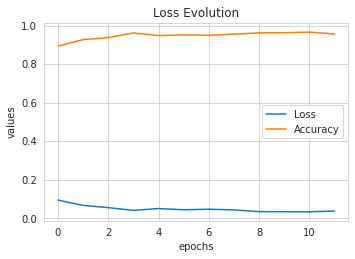

In [171]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(DenseNet121.history['loss'], label='Loss')
plt.plot(DenseNet121.history['accuracy'], label='Accuracy')
plt.legend()
plt.title('Loss Evolution')
plt.xlabel('epochs')
plt.ylabel('values')


In [172]:
evaluationDenseNet121 = model.evaluate(test)
print(f"Test Accuracy: {evaluationDenseNet121[1] * 100:.2f}%")

evaluationDenseNet121T = model.evaluate(train)
print(f"Train Accuracy: {evaluationDenseNet121[1] * 100:.2f}%")

624/624 [==============================] - 22s 35ms/step - loss: 0.6339 - accuracy: 0.7981
Test Accuracy: 79.81%
163/163 [==============================] - 148s 908ms/step - loss: 0.0796 - accuracy: 0.9714
Train Accuracy: 79.81%


In [175]:
evaluationDenseNet121[1]

0.7980769276618958

In [176]:
evaluationDenseNet121T[1]

0.9714340567588806

## ResNet

In [83]:
from keras.applications.inception_resnet_v2 import InceptionResNetV2

In [84]:
model_ResNet= InceptionResNetV2(input_shape=taille, include_top=False, weights='imagenet')

219070464/219055592 [==============================] - 1s 0us/step


In [85]:
# Freeze the base_model
model_ResNet.trainable = False
layers = model_ResNet.layers
print(f"The model has {len(layers)} layers")

The model has 780 layers


In [86]:
model_ResNet.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 320, 320, 3) 0                                            
__________________________________________________________________________________________________
conv2d_100 (Conv2D)             (None, 159, 159, 32) 864         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_100 (BatchN (None, 159, 159, 32) 96          conv2d_100[0][0]                 
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 159, 159, 32) 0           batch_normalization_100[0][0]    
________________________________________________________________________________

In [87]:
model_ResNet.output

<KerasTensor: shape=(None, 8, 8, 1536) dtype=float32 (created by layer 'conv_7b_ac')>

In [88]:
x = model_ResNet.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
# Add a final sigmoid layer for classification
outputs =Dense(1, activation="sigmoid")(x)

In [89]:
model = Model(inputs=model_ResNet.input, outputs=outputs)
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [90]:
ResNet = model.fit(train,epochs=12,validation_data=validation,class_weight=class_weight,
    steps_per_epoch=100,validation_steps=25,
)

Epoch 1/12
100/100 [==============================] - 151s 1s/step - loss: 0.1478 - accuracy: 0.8165 - val_loss: 0.8054 - val_accuracy: 0.7500
Epoch 2/12
100/100 [==============================] - 97s 967ms/step - loss: 0.0863 - accuracy: 0.9012
Epoch 3/12
100/100 [==============================] - 97s 969ms/step - loss: 0.0882 - accuracy: 0.9030
Epoch 4/12
100/100 [==============================] - 97s 965ms/step - loss: 0.0740 - accuracy: 0.9264
Epoch 5/12
100/100 [==============================] - 97s 966ms/step - loss: 0.0574 - accuracy: 0.9321
Epoch 6/12
100/100 [==============================] - 97s 965ms/step - loss: 0.0687 - accuracy: 0.9312
Epoch 7/12
100/100 [==============================] - 98s 974ms/step - loss: 0.0692 - accuracy: 0.9164
Epoch 8/12
100/100 [==============================] - 97s 965ms/step - loss: 0.0698 - accuracy: 0.9344
Epoch 9/12
100/100 [==============================] - 97s 964ms/step - loss: 0.0544 - accuracy: 0.9370
Epoch 10/12
100/100 [============

Text(0, 0.5, 'values')

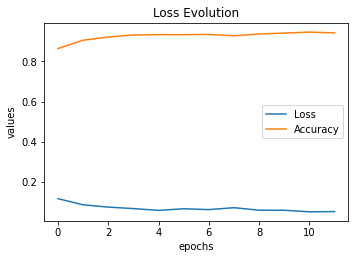

In [91]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(ResNet.history['loss'], label='Loss')
plt.plot(ResNet.history['accuracy'], label='Accuracy')
plt.legend()
plt.title('Loss Evolution')
plt.xlabel('epochs')
plt.ylabel('values')

In [92]:
evaluationResNet = model.evaluate(test)
print(f"Test Accuracy: {evaluationResNet[1] * 100:.2f}%")

evaluationResNetT = model.evaluate(train)
print(f"Train Accuracy: {evaluationResNet[1] * 100:.2f}%")

624/624 [==============================] - 31s 50ms/step - loss: 0.4781 - accuracy: 0.8494
Test Accuracy: 84.94%
163/163 [==============================] - 157s 962ms/step - loss: 0.1097 - accuracy: 0.9502
Train Accuracy: 84.94%


In [93]:
evaluationResNet[1]

0.8493589758872986

In [94]:
evaluationResNetT[1]

0.9501533508300781

## Xception

In [95]:
from keras.applications.xception import Xception

In [96]:
model_Xception= Xception(input_shape=taille, include_top=False, weights='imagenet')

83697664/83683744 [==============================] - 1s 0us/step


In [97]:
# Freeze the base_model
model_Xception.trainable = False
layers = model_Xception.layers
print(f"The model has {len(layers)} layers")

The model has 132 layers


In [98]:
model_Xception.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 320, 320, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 159, 159, 32) 864         input_6[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 159, 159, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 159, 159, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [99]:
model_Xception.output

<KerasTensor: shape=(None, 10, 10, 2048) dtype=float32 (created by layer 'block14_sepconv2_act')>

In [100]:
x = model_Xception.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
# Add a final sigmoid layer for classification
outputs =Dense(1, activation="sigmoid")(x)

In [101]:
model = Model(inputs=model_Xception.input, outputs=outputs)
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [102]:
Xception = model.fit(train,epochs=12,validation_data=validation,class_weight=class_weight,
    steps_per_epoch=100,validation_steps=25,
)

Epoch 1/12
100/100 [==============================] - 107s 981ms/step - loss: 0.1405 - accuracy: 0.8487 - val_loss: 0.4037 - val_accuracy: 0.8125
Epoch 2/12
100/100 [==============================] - 93s 932ms/step - loss: 0.0763 - accuracy: 0.9209
Epoch 3/12
100/100 [==============================] - 93s 928ms/step - loss: 0.0666 - accuracy: 0.9301
Epoch 4/12
100/100 [==============================] - 94s 932ms/step - loss: 0.0631 - accuracy: 0.9335
Epoch 5/12
100/100 [==============================] - 93s 926ms/step - loss: 0.0489 - accuracy: 0.9472
Epoch 6/12
100/100 [==============================] - 94s 934ms/step - loss: 0.0609 - accuracy: 0.9320
Epoch 7/12
100/100 [==============================] - 93s 927ms/step - loss: 0.0512 - accuracy: 0.9399
Epoch 8/12
100/100 [==============================] - 93s 932ms/step - loss: 0.0487 - accuracy: 0.9447
Epoch 9/12
100/100 [==============================] - 93s 932ms/step - loss: 0.0514 - accuracy: 0.9395
Epoch 10/12
100/100 [=========

Text(0, 0.5, 'values')

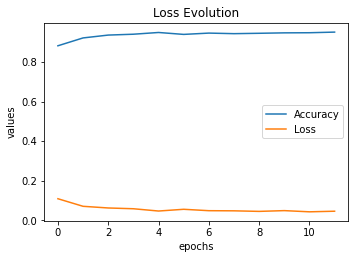

In [103]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(Xception.history['accuracy'], label='Accuracy')
plt.plot(Xception.history['loss'], label='Loss')
plt.legend()
plt.title('Loss Evolution')
plt.xlabel('epochs')
plt.ylabel('values')

In [104]:
evaluationXception = model.evaluate(test)
print(f"Test Accuracy: {evaluationXception[1] * 100:.2f}%")

evaluationXceptionT = model.evaluate(train)
print(f"Train Accuracy: {evaluationXception[1] * 100:.2f}%")

624/624 [==============================] - 22s 35ms/step - loss: 0.4105 - accuracy: 0.8638
Test Accuracy: 86.38%
163/163 [==============================] - 153s 936ms/step - loss: 0.1059 - accuracy: 0.9603
Train Accuracy: 86.38%


In [105]:
evaluationXception[1]

0.8637820482254028

In [106]:
evaluationXceptionT[1]

0.9603143930435181

In [107]:
federatedT = 0.9196702241897583

In [108]:
federated = 0.8028846383094788

# benchmarking

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


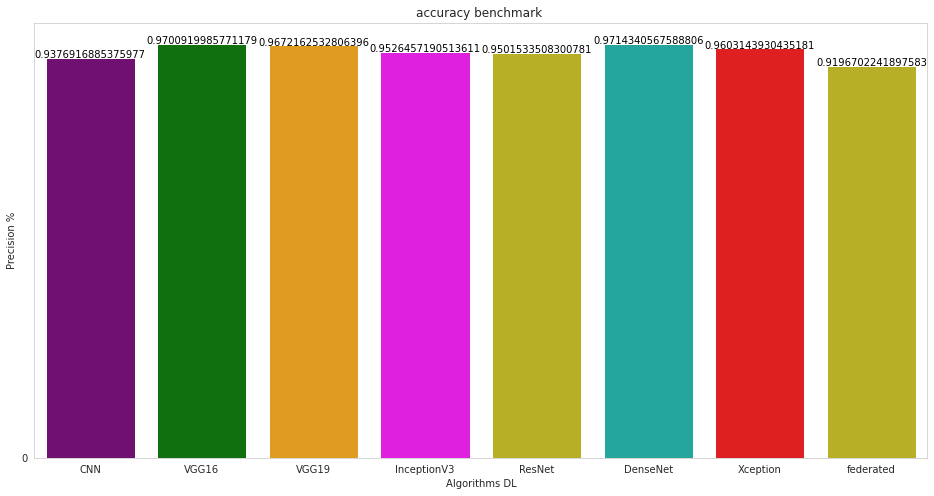

In [177]:

colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE","red","#CFC60E"]
X=['CNN' ,'VGG16','VGG19','InceptionV3','ResNet','DenseNet','Xception','federated']
Y=[evaluationCNNT[1],evaluationVGG16T[1],evaluationVGG19T[1],evaluationV3T[1],evaluationResNetT[1],evaluationDenseNet121T[1],evaluationXceptionT[1],federatedT]
sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Precision %")
plt.xlabel("Algorithms DL")
plt.title("accuracy benchmark ")
g=sns.barplot(X, Y, palette=colors)
for i in range(len(Y)):
    g.text(i, Y[i],Y[i],color='black', ha="center")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


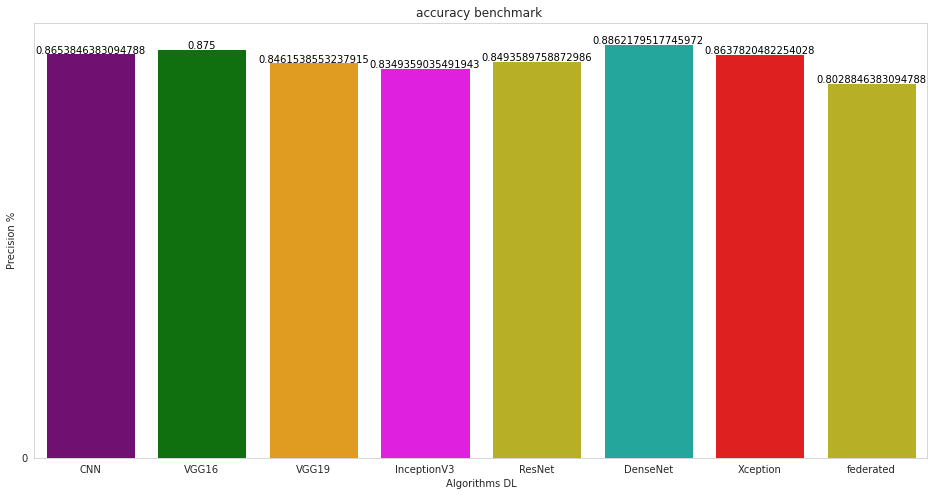

In [110]:

colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE","red","#CFC60E"]
X=['CNN' ,'VGG16','VGG19','InceptionV3','ResNet','DenseNet','Xception','federated']
Y=[evaluationCNN[1],evaluationVGG16[1],evaluationVGG19[1],evaluationV3[1],evaluationResNet[1],evaluationDenseNet121[1],evaluationXception[1],federated]
sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Precision %")
plt.xlabel("Algorithms DL")
plt.title("accuracy benchmark ")
g=sns.barplot(X, Y, palette=colors)
for i in range(len(Y)):
    g.text(i, Y[i],Y[i],color='black', ha="center")
plt.show()

Text(0, 0.5, 'values')

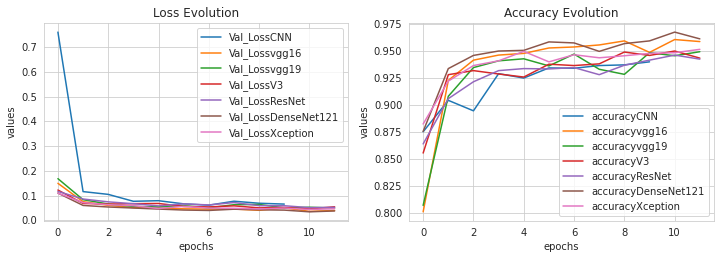

In [111]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)

plt.plot(CNN.history['loss'], label='Val_LossCNN')
plt.plot(vgg16.history['loss'], label='Val_Lossvgg16')
plt.plot(vgg19.history['loss'], label='Val_Lossvgg19')
plt.plot(V3.history['loss'], label='Val_LossV3')
plt.plot(ResNet.history['loss'], label='Val_LossResNet')
plt.plot(DenseNet121.history['loss'], label='Val_LossDenseNet121')
plt.plot(Xception.history['loss'], label='Val_LossXception')
plt.legend()
plt.title('Loss Evolution')
plt.xlabel('epochs')
plt.ylabel('values')

plt.subplot(2, 2, 2)
plt.plot(CNN.history['accuracy'], label='accuracyCNN')
plt.plot(vgg16.history['accuracy'], label='accuracyvgg16')
plt.plot(vgg19.history['accuracy'], label='accuracyvgg19')
plt.plot(V3.history['accuracy'], label='accuracyV3')
plt.plot(ResNet.history['accuracy'], label='accuracyResNet')
plt.plot(DenseNet121.history['accuracy'], label='accuracyDenseNet121')
plt.plot(Xception.history['accuracy'], label='accuracyXception')
plt.legend()
plt.title('Accuracy Evolution')
plt.xlabel('epochs')
plt.ylabel('values')

In [ ]:
CNN.history['accuracy']

In [ ]:
vgg16.history['accuracy']

In [ ]:
vgg19.history['accuracy']

In [ ]:
V3.history['accuracy']

In [ ]:
ResNet.history['accuracy']

In [ ]:
DenseNet121.history['accuracy']

In [ ]:
Xception.history['accuracy']

...............


In [ ]:
CNN.history['loss']

In [ ]:
vgg16.history['loss']

In [ ]:
vgg19.history['loss']

In [ ]:
V3.history['loss']

In [ ]:
ResNet.history['loss']

In [ ]:
DenseNet121.history['loss']

In [ ]:
Xception.history['loss']
